# Convolutional Neural Networks

## Machine learning on images

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### MNIST

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('/tmp/mnist.npz')

11493376/11490434 [==============================] - 4s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [8]:
X_train[0].shape

(28, 28)

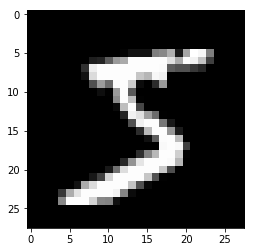

In [9]:
plt.imshow(X_train[0], cmap='gray')

In [10]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [11]:
X_train.shape

(60000, 784)

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [14]:
X_train[0].dtype

dtype('float32')

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [20]:
y_train[0]

5

In [21]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
y_train_cat.shape

(60000, 10)

In [23]:
y_test_cat.shape

(10000, 10)

### Fully connected on images

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K

K.clear_session()

model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [26]:
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 9s 204us/step - loss: 0.3278 - acc: 0.8953 - val_loss: 0.1442 - val_acc: 0.9564
Epoch 2/10
42000/42000 [==============================] - 1s 20us/step - loss: 0.1110 - acc: 0.9661 - val_loss: 0.1165 - val_acc: 0.9651
Epoch 3/10
42000/42000 [==============================] - 1s 21us/step - loss: 0.0718 - acc: 0.9778 - val_loss: 0.1086 - val_acc: 0.9679
Epoch 4/10
42000/42000 [==============================] - 1s 20us/step - loss: 0.0540 - acc: 0.9831 - val_loss: 0.1030 - val_acc: 0.9733
Epoch 5/10
42000/42000 [==============================] - 1s 21us/step - loss: 0.0392 - acc: 0.9881 - val_loss: 0.1070 - val_acc: 0.9741
Epoch 6/10
42000/42000 [==============================] - 1s 21us/step - loss: 0.0306 - acc: 0.9905 - val_loss: 0.1184 - val_acc: 0.9737
Epoch 7/10
42000/42000 [==============================] - 1s 21us/step - loss: 0.0261 - acc: 0.9923 - val_loss: 0.1163 - val_ac

Text(0.5, 0, 'Epochs')

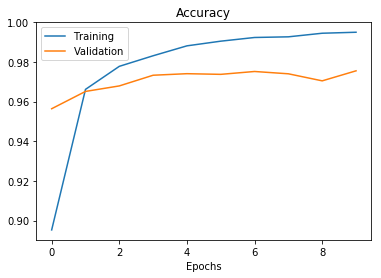

In [27]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [28]:
test_accuracy = model.evaluate(X_test, y_test_cat)[1]
test_accuracy

10000/10000 [==============================] - 0s 27us/step


0.9796

### Tensor Math

In [29]:
A = np.random.randint(10, size=(2, 3, 4, 5))
B = np.random.randint(10, size=(2, 3))

In [30]:
A

array([[[[0, 1, 5, 1, 3],
         [9, 6, 8, 0, 8],
         [8, 2, 0, 9, 7],
         [8, 3, 6, 9, 7]],

        [[4, 1, 4, 5, 9],
         [2, 3, 9, 0, 1],
         [5, 1, 7, 2, 1],
         [3, 0, 1, 9, 7]],

        [[3, 7, 4, 3, 5],
         [5, 9, 2, 6, 4],
         [5, 9, 0, 5, 9],
         [7, 2, 2, 3, 5]]],


       [[[1, 3, 7, 4, 2],
         [1, 6, 6, 8, 2],
         [2, 1, 4, 7, 4],
         [0, 8, 5, 5, 8]],

        [[2, 5, 6, 2, 0],
         [5, 7, 3, 7, 4],
         [6, 8, 8, 8, 4],
         [0, 8, 3, 0, 8]],

        [[4, 0, 5, 9, 5],
         [3, 3, 1, 4, 0],
         [8, 7, 9, 8, 9],
         [6, 5, 4, 2, 7]]]])

In [31]:
A[0, 1, 0, 3]

5

In [32]:
B

array([[7, 5, 0],
       [0, 7, 1]])

#### A random colored image

In [33]:
img = np.random.randint(255, size=(4, 4, 3), dtype='uint8')
img

array([[[149, 204,  50],
        [ 52,  66, 253],
        [120,  26, 124],
        [ 84, 176, 170]],

       [[ 25,  60, 214],
        [157,  71,  54],
        [ 27,  22, 169],
        [213,  49,  92]],

       [[231, 112,  15],
        [176, 123, 210],
        [105, 155,  65],
        [ 74, 206, 240]],

       [[  3, 182, 248],
        [229, 102, 227],
        [ 92,  32, 235],
        [ 14,  63, 101]]], dtype=uint8)

Text(0.5, 1.0, 'Blue channel')

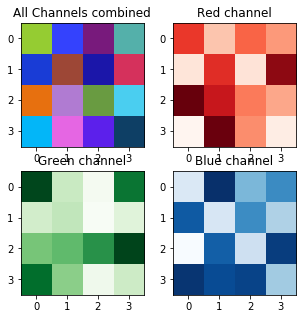

In [34]:
plt.figure(figsize=(5, 5))
plt.subplot(221)
plt.imshow(img)
plt.title("All Channels combined")

plt.subplot(222)
plt.imshow(img[:, : , 0], cmap='Reds')
plt.title("Red channel")

plt.subplot(223)
plt.imshow(img[:, : , 1], cmap='Greens')
plt.title("Green channel")

plt.subplot(224)
plt.imshow(img[:, : , 2], cmap='Blues')
plt.title("Blue channel")

### Tensor operations

In [35]:
2 * A

array([[[[ 0,  2, 10,  2,  6],
         [18, 12, 16,  0, 16],
         [16,  4,  0, 18, 14],
         [16,  6, 12, 18, 14]],

        [[ 8,  2,  8, 10, 18],
         [ 4,  6, 18,  0,  2],
         [10,  2, 14,  4,  2],
         [ 6,  0,  2, 18, 14]],

        [[ 6, 14,  8,  6, 10],
         [10, 18,  4, 12,  8],
         [10, 18,  0, 10, 18],
         [14,  4,  4,  6, 10]]],


       [[[ 2,  6, 14,  8,  4],
         [ 2, 12, 12, 16,  4],
         [ 4,  2,  8, 14,  8],
         [ 0, 16, 10, 10, 16]],

        [[ 4, 10, 12,  4,  0],
         [10, 14,  6, 14,  8],
         [12, 16, 16, 16,  8],
         [ 0, 16,  6,  0, 16]],

        [[ 8,  0, 10, 18, 10],
         [ 6,  6,  2,  8,  0],
         [16, 14, 18, 16, 18],
         [12, 10,  8,  4, 14]]]])

In [36]:
A + A

array([[[[ 0,  2, 10,  2,  6],
         [18, 12, 16,  0, 16],
         [16,  4,  0, 18, 14],
         [16,  6, 12, 18, 14]],

        [[ 8,  2,  8, 10, 18],
         [ 4,  6, 18,  0,  2],
         [10,  2, 14,  4,  2],
         [ 6,  0,  2, 18, 14]],

        [[ 6, 14,  8,  6, 10],
         [10, 18,  4, 12,  8],
         [10, 18,  0, 10, 18],
         [14,  4,  4,  6, 10]]],


       [[[ 2,  6, 14,  8,  4],
         [ 2, 12, 12, 16,  4],
         [ 4,  2,  8, 14,  8],
         [ 0, 16, 10, 10, 16]],

        [[ 4, 10, 12,  4,  0],
         [10, 14,  6, 14,  8],
         [12, 16, 16, 16,  8],
         [ 0, 16,  6,  0, 16]],

        [[ 8,  0, 10, 18, 10],
         [ 6,  6,  2,  8,  0],
         [16, 14, 18, 16, 18],
         [12, 10,  8,  4, 14]]]])

In [37]:
A.shape

(2, 3, 4, 5)

In [38]:
B.shape

(2, 3)

In [39]:
np.tensordot(A, B, axes=([0, 1], [0, 1]))

array([[ 38,  47, 102,  55,  71],
       [111, 109, 123,  53,  89],
       [131,  82, 100, 137,  91],
       [ 77,  82,  72, 110, 147]])

In [40]:
np.tensordot(A, B, axes=([0], [0])).shape

(3, 4, 5, 3)

### 1D convolution

In [41]:
a = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype='float32')

In [42]:
b = np.array([-1, 1], dtype='float32')

In [43]:
c = np.convolve(a, b)

In [44]:
a

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
      dtype=float32)

In [45]:
b

array([-1.,  1.], dtype=float32)

In [46]:
c

array([ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.], dtype=float32)

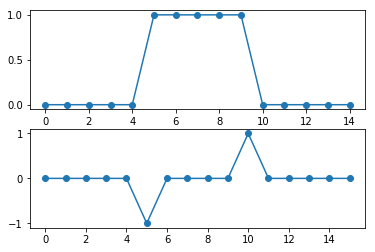

In [47]:
plt.subplot(211)
plt.plot(a, 'o-')

plt.subplot(212)
plt.plot(c, 'o-')

### Image filters with convolutions

In [48]:
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc

In [49]:
img = misc.ascent()

In [50]:
img.shape

(512, 512)

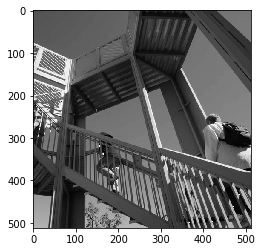

In [51]:
plt.imshow(img, cmap='gray')

In [52]:
h_kernel = np.array([[ 1,  2,  1],
                     [ 0,  0,  0],
                     [-1, -2, -1]])


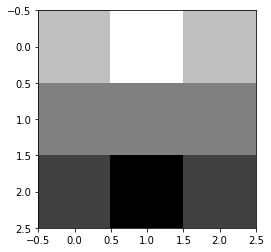

In [53]:
plt.imshow(h_kernel, cmap='gray')

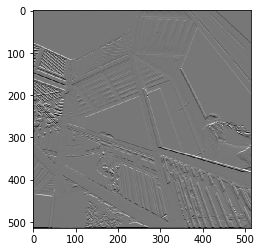

In [54]:
res = convolve2d(img, h_kernel)

plt.imshow(res, cmap='gray')

## Convolutional neural networks

In [56]:
from tensorflow.keras.layers import Conv2D

In [57]:
img.shape

(512, 512)

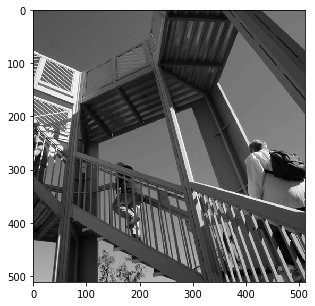

In [58]:
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')

In [59]:
img_tensor = img.reshape((1, 512, 512, 1))

In [60]:
model = Sequential()
model.add(Conv2D(1, (3, 3), strides=(2,1), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [61]:
img_pred_tensor = model.predict(img_tensor)

In [62]:
img_pred_tensor.shape

(1, 255, 510, 1)

In [63]:
img_pred = img_pred_tensor[0, :, :, 0]

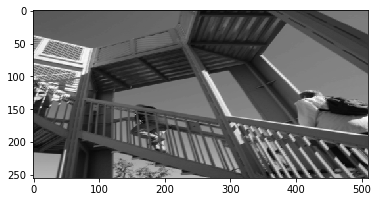

In [64]:
plt.imshow(img_pred, cmap='gray')

In [65]:
weights = model.get_weights()

In [66]:
weights[0].shape

(3, 3, 1, 1)

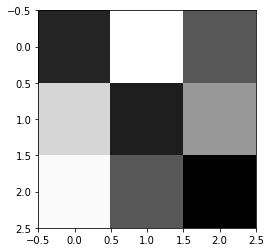

In [67]:
plt.imshow(weights[0][:, :, 0, 0], cmap='gray')

In [68]:
weights[0] = np.ones(weights[0].shape)

In [69]:
model.set_weights(weights)

In [70]:
img_pred_tensor = model.predict(img_tensor)

In [71]:
img_pred = img_pred_tensor[0, :, :, 0]

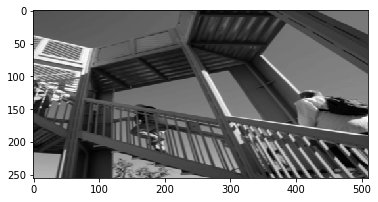

In [72]:
plt.imshow(img_pred, cmap='gray')

In [73]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(512, 512, 1), padding='same'))
model.compile('adam', 'mse')

img_pred_tensor = model.predict(img_tensor)


img_pred_tensor.shape

(1, 512, 512, 1)

## Pooling layers

In [75]:
from tensorflow.keras.layers import MaxPool2D, AvgPool2D

In [76]:
model = Sequential()
model.add(MaxPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [77]:
img_pred = model.predict(img_tensor)[0, :, :, 0]

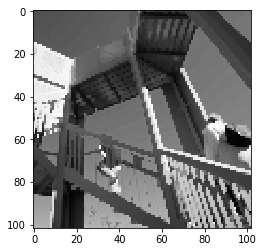

In [78]:
plt.imshow(img_pred, cmap='gray')

In [79]:
model = Sequential()
model.add(AvgPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

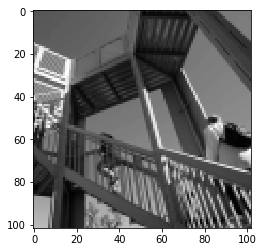

In [80]:
img_pred = model.predict(img_tensor)[0, :, :, 0]
plt.imshow(img_pred, cmap='gray')

## Final architecture

In [81]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [82]:
X_train.shape

(60000, 28, 28, 1)

In [84]:
from tensorflow.keras.layers import Flatten, Activation

In [85]:
K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [86]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.fit(X_train, y_train_cat, batch_size=128,
          epochs=2, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/2
42000/42000 [==============================] - 1s 34us/step - loss: 0.2851 - acc: 0.9148 - val_loss: 0.1303 - val_acc: 0.9610
Epoch 2/2
42000/42000 [==============================] - 1s 27us/step - loss: 0.0837 - acc: 0.9753 - val_loss: 0.0748 - val_acc: 0.9764


In [88]:
model.evaluate(X_test, y_test_cat)

10000/10000 [==============================] - 0s 28us/step


[0.06515536661017686, 0.9769]

### Exercise 1
You've been hired by a shipping company to overhaul the way they route mail, parcels and packages. They want to build an image recognition system  capable of recognizing the digits in the zipcode on a package, so that it can be automatically routed to the correct location.
You are tasked to build the digit recognition system. Luckily, you can rely on the MNIST dataset for the intial training of your model!

Build a deep convolutional neural network with at least two convolutional and two pooling layers before the fully connected layer.

- Start from the network we have just built
- Insert a `Conv2D` layer after the first `MaxPool2D`, give it 64 filters.
- Insert a `MaxPool2D` after that one
- Insert an `Activation` layer
- retrain the model
- does performance improve?
- how many parameters does this new model have? More or less than the previous model? Why?
- how long did this second model take to train? Longer or shorter than the previous model? Why?
- did it perform better or worse than the previous model?

### Exercise 2

Pleased with your performance with the digits recognition task, your boss decides to challenge you with a harder task. Their online branch allows people to upload images to a website that generates and prints a postcard that is shipped to destination. Your boss would like to know what images people are loading on the site in order to provide targeted advertising on the same page, so he asks you to build an image recognition system capable of recognizing a few objects. Luckily for you, there's a dataset ready made with a collection of labeled images. This is the [Cifar 10 Dataset](http://www.cs.toronto.edu/~kriz/cifar.html), a very famous dataset that contains images for 10 different categories:

- airplane 										
- automobile 										
- bird 										
- cat 										
- deer 										
- dog 										
- frog 										
- horse 										
- ship 										
- truck

In this exercise we will reach the limit of what you can achieve on your laptop and get ready for the next session on cloud GPUs.

Here's what you have to do:
- load the cifar10 dataset using `keras.datasets.cifar10.load_data()`
- display a few images, see how hard/easy it is for you to recognize an object with such low resolution
- check the shape of X_train, does it need reshape?
- check the scale of X_train, does it need rescaling?
- check the shape of y_train, does it need reshape?
- build a model with the following architecture, and choose the parameters and activation functions for each of the layers:
    - conv2d
    - conv2d
    - maxpool
    - conv2d
    - conv2d
    - maxpool
    - flatten
    - dense
    - output
- compile the model and check the number of parameters
- attempt to train the model with the optimizer of your choice. How fast does training proceed?
- If training is too slow (as expected) stop the execution and move to the next session!

In [ ]:
from keras.datasets import cifar10